In [1]:
import pandas as pd

#K-Means 라이브러리
from sklearn.cluster import KMeans

#시각화 라이브러리
import matplotlib.pyplot as plt

#Only needed if you want to display your plots inline using Notebook
## change inline to auto if you have Spyder installed
%matplotlib inline

In [3]:
customerData = pd.read_csv("./dataset/customerdata.csv")

In [4]:
customerData.head()

,CUSTID,AVERAGEPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE
0,A13566,4273.900000,3,6.4,1.679181,Big-Screen-lover
1,A14219,3642.441950,2,4.0,2.682023,Sleeping-dog
2,A15312,3653.884565,2,5.0,3.208202,Sleeping-dog
3,A16605,3713.211107,2,6.6,0.900000,Early-bird
4,B10634,3391.074215,2,4.2,2.453656,Sleeping-dog


## 2. 데이터분리

In [45]:
# 기본정보 가져오기
custid = customerData[["CUSTID"]]

# 데이터 분리
features = customerData[["DEVICECOUNT", "PRODUCTAGE"]]

## 3. 모델 선언 및 자율학습 예측하기

In [46]:
# 모델선언 및 feature만 활용하여 자율학습 예측
model = KMeans(n_clusters=3, algorithm="auto") ##clusters는 중심이고, 숫자 설정해준거는 중심 갯수(분류 갯수)
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## 4. 데이터 정리

In [47]:
predict = pd.DataFrame(model.predict(features))
predict.columns = ["PREDICT"]

In [48]:
result = pd.concat([custid, features, predict, customerData['CUSTTYPE']], axis=1)

In [49]:
result.head()

,CUSTID,DEVICECOUNT,PRODUCTAGE,PREDICT,CUSTTYPE
0,A13566,6.4,1.679181,1,Big-Screen-lover
1,A14219,4.0,2.682023,0,Sleeping-dog
2,A15312,5.0,3.208202,0,Sleeping-dog
3,A16605,6.6,0.900000,1,Early-bird
4,B10634,4.2,2.453656,0,Sleeping-dog


## 5. 시각화

ValueError: c of shape (150,) not acceptable as a color sequence for x with size 150, y with size 150

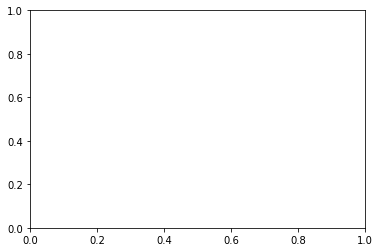

In [51]:
plt.scatter(result["PRODUCTAGE"], result["DEVICECOUNT"], c=result["CUSTTYPE"], alpha=0.7)